In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import numpy as np
import seaborn as sns
from lenskit.datasets import ML100K


### Load  preprocess data

In [3]:
# load original data
#orig_data = pd.read_csv('data/mini_ml100k_user_10_item_25.csv', sep=',', encoding='latin-1')
ml100k = ML100K('ml-100k')
orig_data = ml100k.ratings
orig_data = orig_data[['user', 'item', 'rating']]

## 1 epoch

In [3]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_complete_110321_1333.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


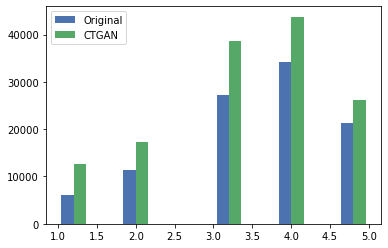

In [19]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

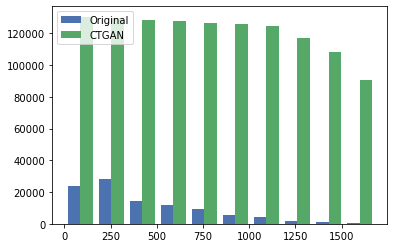

In [5]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [24]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)
#df_items_orig.index.name = None

In [7]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

In [8]:
'''# Sort syn data based on the sorting used for the original data,
# to keep the ratings comparable per item.
combined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)
combined_sorted['idx'] = range(1, (len(df_items_orig)+1))
#combined_sorted
plt.plot(combined_sorted['idx'], combined_sorted['counts_x'], label='Original')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_x'], color='#539ecd', alpha=0.5)
plt.plot(combined_sorted['idx'], combined_sorted['counts_y'], label='CTGAN')
plt.fill_between(combined_sorted['idx'], combined_sorted['counts_y'], color='#4cad6e', alpha=0.5)
plt.legend(loc='upper right')'''

'# Sort syn data based on the sorting used for the original data,\n# to keep the ratings comparable per item.\ncombined_sorted = pd.merge(df_items_orig, df_items_syn, on="item", how="outer").fillna(0)\ncombined_sorted[\'idx\'] = range(1, (len(df_items_orig)+1))\n#combined_sorted\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], label=\'Original\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_x\'], color=\'#539ecd\', alpha=0.5)\nplt.plot(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], label=\'CTGAN\')\nplt.fill_between(combined_sorted[\'idx\'], combined_sorted[\'counts_y\'], color=\'#4cad6e\', alpha=0.5)\nplt.legend(loc=\'upper right\')'

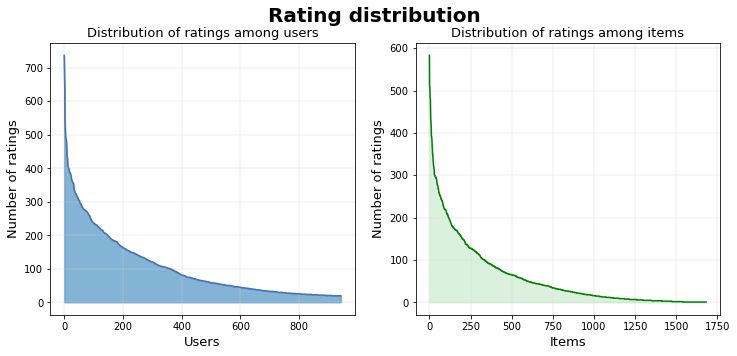

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

fig.suptitle('Rating distribution', size=20, fontweight='bold')
ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

fig.savefig ("original_distribution_ratings_users_items.png")

In [20]:
def plot_distribution(df_orig, df_syn, type_plot):
    plt.figure(figsize=(6,5))
    plt.grid(linewidth=0.4, color='lightgray')
    plt.plot(range(len(df_orig)), df_orig['counts'], label='Original')
    plt.fill_between(range(len(df_orig)), df_orig['counts'], color='#0868ac', alpha=0.5)

    plt.plot(range(len(df_syn)), df_syn['counts'], label='CTGAN')
    plt.fill_between(range(len(df_syn)), df_syn['counts'], color='#bae4bc', alpha=0.5)
    
    plt.grid('on')
    plt.legend(loc='upper right')
    plt.title(f'Distribution of ratings among {type_plot}', size= 20, fontweight='bold')
    plt.xlabel(type_plot, size= 20)#, fontweight='bold')
    plt.ylabel('Number of ratings', size= 20)#, fontweight='bold')
    plt.savefig (f"ml100k_UIM_{type_plot}Distribution.png")



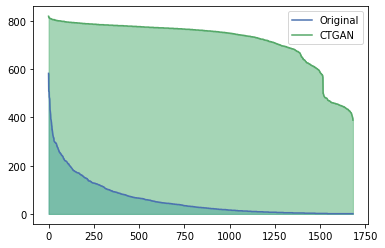

In [10]:
plot_distribution(df_items_orig, df_items_syn)

### User Distribution

In [4]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [6]:
orig_data

,user,item,rating
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
...,...,...,...
99995,880,476,3.0
99996,716,204,5.0
99997,276,1090,1.0
99998,13,225,2.0


In [12]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

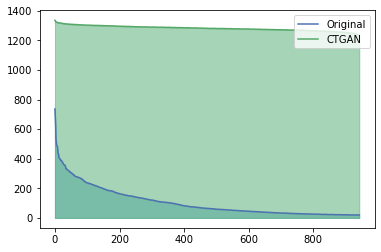

In [13]:
plot_distribution(df_users_orig, df_users_syn)

## 100 epochs

In [5]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_complete_120321_0859_100ep.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

### Rating distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


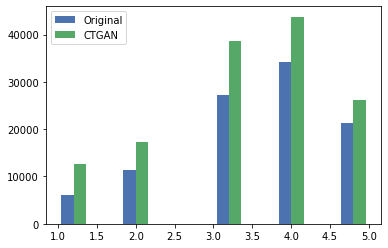

In [6]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item distribution

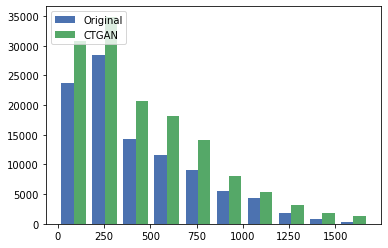

In [7]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [17]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)

In [18]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

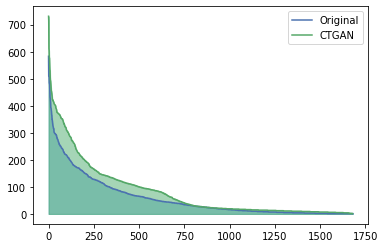

In [19]:
plot_distribution(df_items_orig, df_items_syn)

### User Distribution

In [8]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

In [9]:
df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

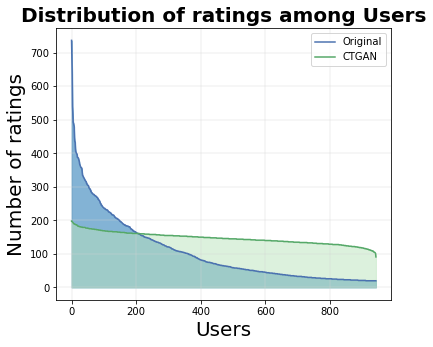

In [21]:
plot_distribution(df_users_orig, df_users_syn, 'Users')

## 250 epochs

In [4]:
# load synthetic data
syn_data =  pd.read_csv('output/synthetic_data/syn_sparse_250eps_1.0.csv', sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]

KeyError: "None of [Index(['user', 'item', 'rating'], dtype='object')] are in the [columns]"

### Rating distribution

In [ ]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item distribution

In [ ]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [ ]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)

In [ ]:
df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

In [ ]:
plot_distribution(df_users_orig, df_users_syn)